# Introduction to Neural Networks

## The multilayer perceptron (MLP)  
<p align="center">
  <img src="../files/input_layer.gif" alt="MNIST 7">
</p>

MLPs are the "hello world" of neural networks. They are a type of artificial neural network that consist of multiple layers of interconnected **neurons**. They have an input layer, one or more **"hidden layers"**, and an output layer. 

You can think of a **neuron** as a function. Neurons take input values and deliver an output value called the **activation**; the inputs and output of a neuron are floating point numbers between 0 and 1. 

1. **Input layer**: The input layer receives the input values from the data. It has one neuron for each input feature.  
  
Imagine that we have images of hand-drawn digits between 0 and 9 that are 28 x 28 pixels. Each pixel has a floating point value betwee 0 and 1 representing the brightness of that pixel. If we "flatten" the image to produce a 1-dimensional vector, we would have a vector of length 784. We can think of this vector as the first layer of our network. Each pixel is a neuron and each grayscale value is that neuron's activation value.   
  
<p align="center">
  <img src="../files/pixels-as-input.png" alt="MNIST 7">
</p>
  
An MLP is a **fully connected** network, which means that each neuron of a given layer is connected to every other neuron from the previous layer.

2. **Hidden layers**: The hidden layers are those between the input layer and the final output layer and its where the "magic" happens. These layers process input values and produce intermediate output values (vectors of activation values). They are typically made up of multiple neurons. The number of hidden layers and the number of neurons in each layer are **hyperparameters** that can be tuned to optimize the performance of the network.  

The connection between each neuron in a hidden layer in an MLP and the neurons in the layer preceeding it can be defined by the following function:  
$$a_k^{(l)} = \sigma(\Sigma_{i=0}^n(w_{k,i} \cdot a_i^{(l-1)}) + b_k$$
Where:
- a is the activation value of neuron k (or n) from layer l
- w is the weight, which represents the strength of the connection between neurons k and n. 
- b is the bias parameter, which represents the constant term added to the weighted input. The bias parameter can be thought of as a "threshold" that controls how large or small the weighted sum of previous activations term $ \left(\sum_{i=0}^n w_{k,i} \cdot a_i^{(l-1)}\right) $ must be before it influences the activation value of neuron k in layer l. 
- σ is the activation function, which "squeezes" the output value of the neuron to a value between 0 and 1.
  - The activation function is a non-linear transformation function that maps activation values that could range from $-\infty$ to $\infty$ to values that (classically) range from 0 to 1. Common activation functions include sigmoid, hyperbolic tangent, ReLU, and Leaky ReLU. (more on these later)

The above can be simplified to represent the relationship between the activation values of all neurons in layer l to all neurons in layer l - 1.
$$ a^{(l)} = \sigma(W^{(l)} \cdot a^{(l-1)}) + b^{(l)}) $$  
  
- a is a vector of all neuron activation values in layer l
- W is a matrix of weights, where the rows represent the neurons in layer l and the columns represent the neurons in layer l - 1.
- b is a vector of bias terms, where the elements represent the bias term for each neuron in layer l.

Together, the weights and biases are the adjustable *parameters* of the neural network. Even in a simple fully connected network, the number of weights and biases can become quite large. For example, if we had input images of size 28 x 28, two hidden layers each with 5 neurons, and an output layer of 10 neurons for each digit 0 – 9, then the number of adjustable parameters would be:  
|Layer | weights | biases|
|------|--------|--------|
|Input  | 784 * 5 | 5      |
|Hidden 1| 5 * 5 | 5      |
|Hidden 2| 5 * 5 | 5 |
|Output | 5 * 10 | 10     |
|Total | 4020 | 25 |


**Summary:** every single neuron in layer l is connected to every single neuron in layer l - 1, and this connection involves a weight term specific to each neuron-neuron pair, a bias term specific to each neuron in layer l, and a pre-defined activation function to squeeze the output to be between 0 and 1.  

3. **Output layer**: The output layer produces the final output values. In the case of a classification problem, the output layer typically has one neuron for each class, and the activation values of these neurons represent the "probability" of the input being in each class. The output layer uses a different activation function than the hidden layers, such as a softmax function ($ \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} $)  

## Activation functions
Activation functions are mathematical functions that determine the output of a neuron given its input. There are many popular activation functions, such as:
  
- Sigmoid: $ ( S(x) = \frac{1}{1 + e^{-x}} ) $
- Hyperbolic tangent: $ ( \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} ) $
- ReLU: $ ( \max(0, x) ) $
- Leaky ReLU: $ ( \max(0.01x, x) ) $

## Training neural networks
<p align="center">
  <img src="../files/mlp_training.gif" alt="MNIST 7">
</p>
Training neural networks involves adjusting the weights and biases of the neurons using a dataset of input-output pairs. The goal is to minimize the error between the predicted and actual output values. 

## Backpropagation
Backpropagation is an algorithm used in training neural networks to minimize the error between the predicted and actual output values. It involves updating the weights and biases of the neurons in the network iteratively, using the chain rule to compute the gradient of the error function with respect to the weights and biases.

Here’s how backpropagation works:

### 1. **Forward Pass:**
   - During the forward pass, the input data are passed through the network layer by layer. Each neuron performs a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.

### 2. **Loss Calculation:**
   - Once the output is produced, a **loss function** (such as Mean Squared Error for regression or Cross-Entropy for classification) is used to measure the difference between the network's predicted output and the actual target.
   - This loss represents the error in the network’s prediction.

### 3. **Backward Pass (Backpropagation of Errors):**
   - Backpropagation calculates how much each weight in the network contributed to the total error. This is done by applying the **chain rule of calculus** to propagate the error backward through the network, from the output layer to the input layer.
   - The gradient of the loss with respect to each weight is computed. This gradient indicates how changing a weight will affect the loss.
<table>
  <tr>
    <td align="left" style="width: 50%;">
      <img src="../files/gradient_descent.gif" alt="grad descent">
    </td>
    <td align="right" style="width: 50%;">
      <img src="../files/propagate-backwards.png" alt="backprop">
    </td>
  </tr>
</table>

### 4. **Weight Update:**
   - Once the gradients are calculated, the weights are updated using an optimization algorithm (typically **Stochastic Gradient Descent** or more advanced variants like **Adam**).
   - The weights are adjusted in the direction that minimizes the error (i.e., in the opposite direction of the gradient), allowing the network to improve its predictions over time.

### Key Concepts in Backpropagation:
- **Chain Rule:** Backpropagation relies on the chain rule to efficiently compute gradients for each layer by propagating the errors backward, starting from the output.
- **Gradient Descent:** The weights are updated based on the gradient of the loss with respect to each weight. The update rule is typically `w = w - η * ∂L/∂w`, where `η` is the learning rate and `∂L/∂w` is the gradient of the loss `L` with respect to weight `w`.
- **Epochs:** The process of forward and backward passes is repeated for multiple epochs (iterations over the entire dataset) until the model converges to a solution with minimal error.

There are several optimization algorithms and techniques used to train neural networks, such as:   
- Gradient descent: Update the weights and biases using the formula: weight = weight - learning_rate * gradient
- Stochastic gradient descent: Update the weights and biases using a single randomly chosen input-output pair
## Overfitting and underfitting
Overfitting occurs when a neural network learns the training data too well, capturing noise and not generalizing well to new, unseen data. Underfitting occurs when the neural network fails to capture the underlying patterns in the training data, resulting in poor performance on both the training and testing data.

To prevent overfitting, you can use techniques such as:

- Regularization: Add a penalty term to the loss function to encourage the weights and biases to be small and not too complex
- Early stopping: Stop training the neural network when the validation loss starts to increase
To prevent underfitting, you can try increasing the complexity of the neural network, using more hidden layers and neurons, or using techniques like dropout or data augmentation to artificially increase the size of the training dataset.


# Code example
## Explanation of Key Concepts

### Neural Network Architecture

- The `MLP` class defines a simple Multi-Layer Perceptron with two hidden layers.
- The input layer has 28*28 neurons (one for each pixel in the MNIST images).
- The first hidden layer has 128 neurons, and the second hidden layer has 64 neurons.
- The output layer has 10 neurons, corresponding to the 10 classes of digits (0-9).

### Data Transformations and Augmentations

- Data transformations are applied to normalize the images and convert them to tensors.
- Data augmentation techniques like random rotations and translations are used to artificially increase the diversity of the training data, which can help improve the model's generalization.

### Training Functions

- The training loop iterates over the dataset multiple times (epochs).
- For each batch of images, the model performs a forward pass to compute the outputs.
- The loss is computed using the `CrossEntropyLoss` function, which measures the difference between the predicted and true labels.
- Backpropagation is performed to compute the gradients of the loss with respect to the model's parameters.
- The optimizer updates the model's parameters using the computed gradients.

### Backpropagation and Loss

- Backpropagation is the process of computing the gradients of the loss function with respect to the model's parameters.
- The loss function used here is `CrossEntropyLoss`, which is commonly used for classification tasks.
- The optimizer (Adam) updates the model's parameters to minimize the loss.

### Evaluation

- The model is evaluated on the test dataset to measure its accuracy.
- The accuracy is computed as the percentage of correctly classified images.

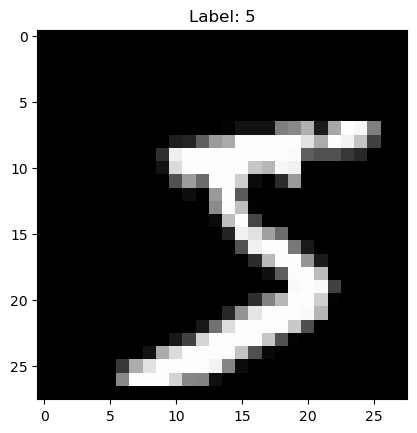

Epoch 10, Loss: 1.1130448654294014, Accuracy: 78.86%
Epoch 20, Loss: 0.8633476942777634, Accuracy: 84.28%
Epoch 30, Loss: 0.6701811505481601, Accuracy: 83.16%
Epoch 40, Loss: 0.5057461811229587, Accuracy: 86.87%
Epoch 50, Loss: 0.5053929910063744, Accuracy: 89.23%


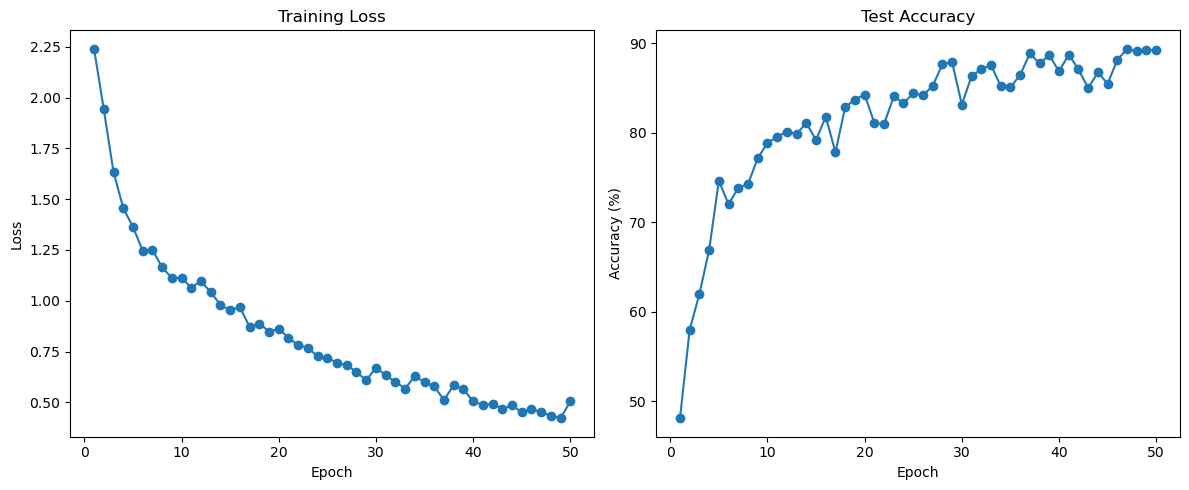

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Define the layers of the neural network
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer (input to hidden)
        self.fc2 = nn.Linear(128, 64)     # Second fully connected layer (hidden to hidden)
        self.fc3 = nn.Linear(64, 10)      # Third fully connected layer (hidden to output)
        self.relu = nn.ReLU()             # ReLU activation function
        self.leakyrelu = nn.LeakyReLU() # Leaky ReLU activation function
        self.softmax = nn.LogSoftmax(dim=1)  # LogSoftmax activation function for output layer
    
    def forward(self, x):
        # Forward pass through the network
        x = x.view(-1, 28*28)  # Flatten the input image
        x = self.relu(self.fc1(x))  # Apply ReLU after first layer
        x = self.relu(self.fc2(x))  # Apply ReLU after second layer
        x = self.fc3(x)  # Output layer
        return self.softmax(x)  # Apply LogSoftmax to the output

# Load the MNIST dataset
use_augmentation = True
if not use_augmentation:
    # without data augmentation
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
else:
    # with data augmentation
    # Define the data augmentation and normalization transforms
    transform = transforms.Compose([
        transforms.RandomRotation(10),  # Randomly rotate the image by 10 degrees
        transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Randomly translate the image
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) # Normalize the image
    ])

    # Load the MNIST dataset with the defined transforms
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))

# Use a small subset of the dataset for training
subset_indices = list(range(1000))  # Use the first 1000 samples
mnist_train_subset = Subset(mnist_train, subset_indices)

# Visualize one of the training images
image, label = mnist_train_subset[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

# Define the dataloaders for training and testing datasets
train_loader = DataLoader(mnist_train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()  # Using Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer

# Training loop with visualization
num_epochs = 50
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update the weights
        running_loss += loss.item()  # Accumulate the loss
    
    train_losses.append(running_loss / len(train_loader))  # Average loss for the epoch
    
    # Evaluate the model
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    
    test_accuracies.append(100 * correct / total)  # Accuracy for the epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct / total}%")

# Plotting the training loss and test accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()